# Beta Bank Churn Predictions

## Introduction

In this project we aim to train a prediction model for churns of Beta Bank. It will be used to identify customers with high probabilities of leaving soon in order to create strategies to retain these customers or improving any faults that these customers may point out. As a general overview, the data will be prepared, analyzed and then used to train a model. The model will be tested on a test set and the results will be evaluated. We expect the final model to be useful in generating intelligence and predictions to help Beta Bank in making the best decisions on their marketing and customer service activities.


## Data Preprocess

### Objective


The first step is to explore data and validate information. Data often comes with a few unpredicted issues, and these will be fixed in this preprocessing section.  These can include missing values, artifacts and incorrect data types. We will take a first look at the data and the information available while making sure the values are correctly loaded: numeric data should correctly be assigned as integer or float, corresponding to their values. At the end of this section, we expect to have data ready for analysis and the drawing of results.

### Code

In [227]:
import pandas as pd

path_array = ['', '/', '/datasets/', './datasets/', '../datasets/']
CSVPATH = None

for i in path_array:
    try:
        pd.read_csv(i + 'Churn.csv', nrows=1)
        CSVPATH = i
    except:
        pass

if CSVPATH:
    print('Path found is', 'current folder' if CSVPATH == '' else CSVPATH)
else:
    print('No path found')

Path found is ../datasets/


In [228]:
df = pd.read_csv(i + 'Churn.csv')

In [229]:
def optimize_types(df):
    df_dtypes = df.dtypes
    df_names = df.index
    df_types = [i.name for i in df_dtypes.values]
    df_types = dict(zip(df_names, df_types))
    return df_types

float_columns = ['Balance', 'EstimatedSalary', 'Tenure']

for col in float_columns:
    df[col] = pd.to_numeric(df[col], downcast = 'float')

int_columns = [ ]

uint_columns = [ 'RowNumber', 
                 'CustomerId', 
                 'CreditScore',
                 'CustomerId',
                 'Age',
                 'NumOfProducts']


for col in int_columns:
    df[col] = pd.to_numeric(df[col], downcast = 'integer')

for col in uint_columns:
    df[col] = pd.to_numeric(df[col], downcast = 'unsigned')

bool_columns = ['IsActiveMember',
                'Exited',
                'HasCrCard' ]

df[bool_columns] = df[bool_columns].astype('bool')
    
df_types = optimize_types(df)

df = pd.read_csv(
    CSVPATH+'Churn.csv', 
    dtype=df_types)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null uint16
CustomerId         10000 non-null uint32
Surname            10000 non-null object
CreditScore        10000 non-null uint16
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null uint8
Tenure             9091 non-null float32
Balance            10000 non-null float32
NumOfProducts      10000 non-null uint8
HasCrCard          10000 non-null bool
IsActiveMember     10000 non-null bool
EstimatedSalary    10000 non-null float32
Exited             10000 non-null bool
dtypes: bool(3), float32(3), object(3), uint16(2), uint32(1), uint8(2)
memory usage: 478.6+ KB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.000000,1,True,True,101348.882812,True
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.859375,1,False,True,112542.578125,False
2,3,15619304,Onio,502,France,Female,42,8.0,159660.796875,3,True,False,113931.570312,True
3,4,15701354,Boni,699,France,Female,39,1.0,0.000000,2,False,False,93826.632812,False
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.820312,1,True,True,79084.101562,False


In [230]:
print(f'Number of duplicated rows: {df[df.duplicated()].shape[0]}')

Number of duplicated rows: 0


In [231]:
print('Max count of same customer ID:', df['CustomerId'].value_counts().max())

Max count of same customer ID: 1


In [232]:
df['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

In [233]:
display(df.describe().round(2))
display(df[['Surname', 'Geography', 'Gender', 'IsActiveMember', 'Exited']].describe())

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.00,10000.00,10000.00,10000.00,9091.00,10000.00,10000.00,10000.00
mean,5000.50,15690940.57,650.53,38.92,5.00,76485.89,1.53,100090.23
std,2886.90,71936.19,96.65,10.49,2.89,62397.41,0.58,57510.49
min,1.00,15565701.00,350.00,18.00,0.00,0.00,1.00,11.58
25%,2500.75,15628528.25,584.00,32.00,2.00,0.00,1.00,51002.11
50%,5000.50,15690738.00,652.00,37.00,5.00,97198.54,1.00,100193.91
75%,7500.25,15753233.75,718.00,44.00,7.00,127644.24,2.00,149388.25
max,10000.00,15815690.00,850.00,92.00,10.00,250898.09,4.00,199992.48


,Surname,Geography,Gender,IsActiveMember,Exited
count,10000,10000,10000,10000,10000
unique,2932,3,2,2,2
top,Smith,France,Male,True,False
freq,32,5014,5457,5151,7963


In [234]:
print(f"Percentage of missing values in Tenure column: {df[df['Tenure'].isna()].shape[0]/df.shape[0]:.2%}" )
df['Tenure'] = pd.to_numeric(df['Tenure'].fillna(5).astype('int'), downcast='unsigned')
print('Empty Tenure values have been filled in with 5, which is both the median and the mean.')

Percentage of missing values in Tenure column: 9.09%
Empty Tenure values have been filled in with 5, which is both the median and the mean.


In [235]:
eda_df = df

### Results

Data has been loaded with optimized data types and no duplicates were found. Around 10% of the data has missing values for Tenure. Next, we will take a look at the distributions and prepare our datasets for model training.


## Exploratory Data Analysis



### Objective


In this section, we will plot histograms of data each plan, so we can have a general understanding of the information before training the churn prediction model. A scatterplot matrix should be plotted beforehand to check the correlations and what factors can affect our suggestions on user plans.


### Code

In [236]:
import matplotlib.pyplot as plt
from IPython.display import display

eda_df.corr()['Exited']

RowNumber         -0.016571
CustomerId        -0.006248
CreditScore       -0.027094
Age                0.285323
Tenure            -0.015989
Balance            0.118533
NumOfProducts     -0.047820
HasCrCard         -0.007138
IsActiveMember    -0.156128
EstimatedSalary    0.012097
Exited             1.000000
Name: Exited, dtype: float64

In [237]:
countries = list(eda_df["Geography"].unique())
print(f'Locations available: {countries}', end='\n\n')

print('Location counts:')
display(eda_df['Geography'].value_counts())

print('\nCustomers by country (%), Exited by country (%):')

for country in countries:
    print(country, ': ', f'{eda_df.query("Geography == @country").shape[0]/eda_df.shape[0]:.2%}, {eda_df.query("Geography == @country and Exited == True").shape[0]/eda_df.query("Geography == @country").shape[0]:.2%}', sep='')

Locations available: ['France', 'Spain', 'Germany']

Location counts:


France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


Customers by country (%), Exited by country (%):
France: 50.14%, 16.15%
Spain: 24.77%, 16.67%
Germany: 25.09%, 32.44%


In [238]:
genders = list(eda_df["Gender"].unique())

print('Gender counts:')
display(eda_df['Gender'].value_counts())

print('\nCustomers by gender (%), Exited by gender (%):')

for gender in genders:
    print(gender, ': ', f'{eda_df.query("Gender == @gender").shape[0]/eda_df.shape[0]:.2%}, {eda_df.query("Gender == @gender and Exited == True").shape[0]/eda_df.query("Gender == @gender").shape[0]:.2%}', sep='')

Gender counts:


Male      5457
Female    4543
Name: Gender, dtype: int64


Customers by gender (%), Exited by gender (%):
Female: 45.43%, 25.07%
Male: 54.57%, 16.46%


In [239]:
eda_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000000,1,True,True,101348.882812,True
1,2,15647311,Hill,608,Spain,Female,41,1,83807.859375,1,False,True,112542.578125,False
2,3,15619304,Onio,502,France,Female,42,8,159660.796875,3,True,False,113931.570312,True
3,4,15701354,Boni,699,France,Female,39,1,0.000000,2,False,False,93826.632812,False
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820312,1,True,True,79084.101562,False


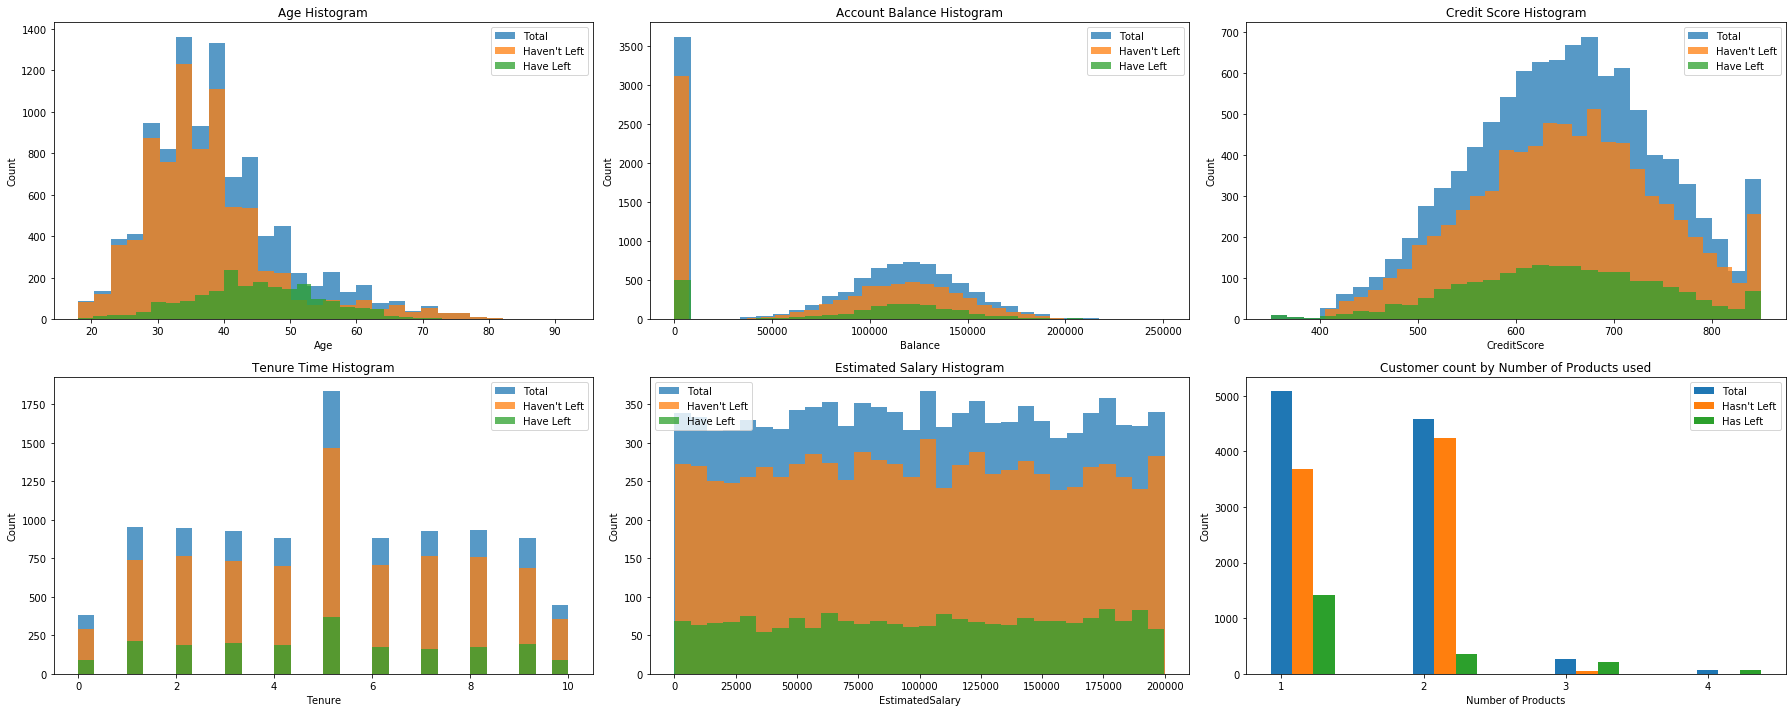

In [240]:
histogram_plots = ['Age', 'Balance', 'CreditScore', 'Tenure', 'EstimatedSalary']

title = ['Age Histogram', 'Account Balance Histogram', 'Credit Score Histogram', 'Tenure Time Histogram', 'Estimated Salary Histogram']

exit = eda_df[eda_df['Exited'] == True].reset_index(drop=True)

no_exit = eda_df[eda_df['Exited'] == False].reset_index(drop=True)


fig, axs = plt.subplots(2,3)
fig.set_size_inches(25, 10)
fig.set_tight_layout(True)

for col, t in zip(histogram_plots, title):
    if histogram_plots.index(col) < 3:
        axs[0, histogram_plots.index(col)].hist(eda_df[col], bins=30, alpha=0.75)
        axs[0, histogram_plots.index(col)].hist(no_exit[col], bins=30, alpha=0.75)
        axs[0, histogram_plots.index(col)].hist(exit[col], bins=30, alpha=0.75)
        axs[0, histogram_plots.index(col)].legend(['Total', "Haven't Left", "Have Left"])
        axs[0, histogram_plots.index(col)].set(ylabel = 'Count', xlabel = col, title=t)
    else:   
        axs[1, histogram_plots.index(col)-3].hist(eda_df[col], bins=30, alpha=0.75)
        axs[1, histogram_plots.index(col)-3].hist(no_exit[col], bins=30, alpha=0.75)
        axs[1, histogram_plots.index(col)-3].hist(exit[col], bins=30, alpha=0.75)
        axs[1, histogram_plots.index(col)-3].legend(['Total', "Haven't Left", "Have Left"])
        axs[1, histogram_plots.index(col)-3].set(ylabel = 'Count', xlabel = col, title=t)
        
axs[1,2].bar(eda_df['NumOfProducts'].value_counts().index, eda_df['NumOfProducts'].value_counts().values, 0.15)
axs[1,2].bar(no_exit['NumOfProducts'].value_counts().index + 0.15, no_exit['NumOfProducts'].value_counts().values, 0.15)
axs[1,2].bar(exit['NumOfProducts'].value_counts().index + 0.30, exit['NumOfProducts'].value_counts().values, 0.15)
axs[1,2].set(
    xticks=[1, 2, 3, 4],
    title='Customer count by Number of Products used',
    xlabel='Number of Products',
    ylabel='Count')
axs[1,2].legend(['Total', "Hasn't Left" , "Has Left"])
plt.show()

*Graph Analysis*

A relevant feature is the age of the customer. We can see that the distribution of age for customer who have left is significantly different than the distribution of customers in general. The mean and median age of customers who have left are close to 45 years-old, ranging from 30 to 65. Meanwhile, the average age of customers is 38 years-old and the distribution is heavily skewed to the right. As for the other featuires, they are generally not prominent in determining the probability of leaving. Therefore, different models using various input combinations will be tested before deciding on the best model, both in terms of accuracy and efficiency.

By looking at the number of products graph, we can see that users that use two of the products are less likely to leave, suggesting that these are the most loyal users. On the other hand, all of the customers that used more than two products have left the company, although they only count to less than 500 customers. A reason would be that these users had just started using the company services and were trying as many products as possible, but they had not felt satisfied with the overall experience.

### Results

We have taken a look at distributions of data to decide on the most important features to be used in our model. No specific features were found to be defining and therefore we will need to test different combinations of features. However, information on geography and gender show different patterns for churn rates, as well as number of products used. The graph shows double the churn rates for users in Germany when compared to both Spain and France, reaching up to 32% of users. As for female users, they have left the bank slightly more often that male users, reaching up to 25%. Additionally, we can also conclude that customers that use two products are less likely to leave the bank, while users that use more than two products generally do not stay.

## Model Training

### Objective

A machine learning model is a program trained by a computer to generate output (prediction) based on input (features), by identifying patterns of data to which it has been previously exposed. This program can be configured by changing the classification methods and its settings (hyperparameters) such as the intrinsic complexity of the program, as well as the data to which it has been exposed. These models can be classifiers or regressors that can predict categorical or numerical variables respectively.

Our objective is to produce a model that can predict churns in Beta bank based on data of previous users, so we will be using classifiers. We expect to introduce features of users each at a time (observations), and receive predictions. We will try out reducing the number of features to get a succesfull model with the least number of information from the user. To accomplish that, we will try out a few different classifiers and tune them to get the most succesful result.

### Code

In [241]:
drop_cols = ['CustomerId', 'Surname', 'RowNumber', 'HasCrCard', 'Balance'] 
df = eda_df.drop(drop_cols, axis=1)


In [242]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

def feat_prep_ohe_scaler(indf, ohe_encoder=None, std_scaler=None):
    """
    Apply OHE and Scale on a df of strings and numbers. Object columns are automatically found and OHE is applied to them. After that, numbers are scaled. The encoder and the scaler can be manually passed, otherwise they are created.

    Output is feature-prepared DataFrame, OneHotEncoder object and StandardScaler object.
    obs: DataFrame has no object columns and the encoded objects are on the rightmost columns.
    """
    ret = 0
    df = indf
    # create encoders if None were passed
    if ohe_encoder == None:
        ohe_encoder = OneHotEncoder(handle_unknown='error', drop='first')
        ret+=1
    if std_scaler == None:
        std_scaler = StandardScaler()
        ret+=2

    # Find object and boolean variables
    object_cols = []
    bool_cols = []
    for col, dtype in zip(df.columns, df.dtypes):
        if dtype == 'object':
            object_cols.append(col)
        if dtype in ['bool']:
            bool_cols.append(col)

    # Train ohe_encoder on object columns
    ohe_encoder.fit(df[object_cols])

    # Transform and create encoded df
    ohe_encoded = pd.DataFrame(
                data=ohe_encoder.transform(df[object_cols]).toarray(), 
                columns=ohe_encoder.get_feature_names(object_cols)
    ).astype('bool')

    # backup_boolean_cols
    df_bool = df[bool_cols]
    df = df.drop(bool_cols, axis=1)

    # Leave df with numerical columns only by dropping objects and adding ohe
    df = df.drop(object_cols, axis=1)

    # Train scaler
    std_scaler.fit(df)
    
    # Transform and create scaled df
    scaler = pd.DataFrame(
        std_scaler.transform(df), 
        columns=df.columns
        )

    df = df_bool.join(scaler).join(ohe_encoded)

    return {
         0: df,
         1: [df, ohe_encoder],
         2: [df, std_scaler],
         3: [df, ohe_encoder, std_scaler]
    }[ret]
    

In [243]:
ohe_df, ohe_encoder, std_scaler = feat_prep_ohe_scaler(df)

display(ohe_df.head())

,IsActiveMember,Exited,CreditScore,Age,Tenure,NumOfProducts,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,True,True,-0.326221,0.293517,-1.086246,-0.911583,0.021887,False,False,False
1,True,False,-0.440036,0.198164,-1.448581,-0.911583,0.216534,False,True,False
2,False,True,-1.536794,0.293517,1.087768,2.527057,0.240687,False,False,False
3,False,False,0.501521,0.007457,-1.448581,0.807737,-0.108918,False,False,False
4,True,False,2.063884,0.388871,-1.086246,-0.911583,-0.365276,False,True,False


In [244]:
def split_df(df, train=3, valid=1, test=1):
    split_size = int(df.shape[0]/(train+valid+test))
    train_df = df[0 : train*split_size].reset_index(drop=True)
    valid_df = df[train*split_size+1 : (train+valid)*split_size].reset_index(drop=True)
    test_df = df[(train+valid)*split_size+1 : df.shape[0]].reset_index(drop=True)
    return train_df, valid_df, test_df

train_df, valid_df, test_df = split_df(ohe_df)

print('Splitting dataframes in proportion: 3, 1, 1')
print('Train dataframe size:', train_df.shape[0])
print('Validation dataframe size:', valid_df.shape[0])
print('Test dataframe size:', test_df.shape[0])

Splitting dataframes in proportion: 3, 1, 1
Train dataframe size: 6000
Validation dataframe size: 1999
Test dataframe size: 1999


In [245]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics

def target_features(df, tar_col, remove=[]):
    target = df[tar_col]
    remove.append(tar_col)
    features = df[[x for x in train_df.columns.values if x not in remove]]
    return target, features

In [246]:
def find_level(model, param, level=10):
    best = {
        'i': -1, 
        'score': -1
    }
    for i in range(1, level+1):
        setattr(model, param, i)
        model.fit(train_feat, train_target)
        score = model.score(valid_feat, valid_target)
        if (score - best['score']) > 0.001:
            best['score'] = score
            best['i'] = i
    return best['score'], best['i']

def report(target, features=None, predictions=None, model=None, predictions_proba=None, output=True):
    flag = 0
    if model != None:
        if predictions is not None:
            if 'warnings' not in sys.modules:
                from warnings import warn
            warnings.warn('Both model and predictions were passed. Ignoring model.')
        else:
            if features is None:
                raise ValueError('Features must be passed if model is passed.')
            predictions = model.predict(features)
            predictions_proba = model.predict_proba(features)
    if predictions is not None:
        print(f'Accuracy: {metrics.accuracy_score(target,predictions):.2%}') 
        print(f'Recall: {metrics.recall_score(target,predictions):.2%}')
        print(f'Precision: {metrics.precision_score(target,predictions):.2%}')
        print(f'F1 Score: {metrics.f1_score(target,predictions):.2%}')
    if predictions_proba is not None:
        fpr, tpr, thresholds = metrics.roc_curve(target, predictions_proba[:,1])
        print(f'AUC-ROC: {metrics.roc_auc_score(target,predictions_proba[:,1]):.2%}')
        flag = 1
    if flag == 1 and output == True:
        return fpr, tpr, thresholds
    else:
        return None

In [247]:
train_target, train_feat = target_features(train_df, 'Exited')

valid_target, valid_feat = target_features(valid_df, 'Exited')

test_target, test_feat = target_features(test_df, 'Exited')

from sklearn.utils import shuffle

def resample(features, target, repeat, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_resampled = pd.concat([features_zeros.sample(frac=fraction, random_state=1995)] + [features_ones] * repeat)
    target_resampled = pd.concat([target_zeros.sample(frac=fraction, random_state=1995)] + [target_ones] * repeat)
    
    features_resampled, target_resampled = shuffle(
        features_resampled, target_resampled, random_state=1995)
    
    return features_resampled, target_resampled

train_feat, train_target = resample(train_feat, train_target, 2, 0.75)
fprVec = []
tprVec = []
thresholdsVec = []

In [248]:
# Launching linear model
linear_model = LogisticRegression(
    solver='liblinear',
    random_state=1995,
    class_weight= {
        1: 0.95,
        0: 1
    }
)

display(linear_model.fit(train_feat, train_target))
print('\nReport of linear model:')
fpr, tpr, thresholds = report(test_target, features=test_feat, model=linear_model)
fprVec.append(fpr)
tprVec.append(tpr)
thresholdsVec.append(thresholds)

LogisticRegression(C=1.0, class_weight={0: 1, 1: 0.95}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1995, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


Report of linear model:
Accuracy: 76.14%
Recall: 52.05%
Precision: 41.18%
F1 Score: 45.98%
AUC-ROC: 74.14%


In [249]:
# Launching tree model and finding the ideal depth
tree_model = DecisionTreeClassifier(
    random_state=1995,
    class_weight='balanced'
    )

score, level = find_level(tree_model, 'max_depth', 100)

tree_model.max_depth = level
display(tree_model.fit(train_feat, train_target))

print('\nReport of tree model:')

fpr, tpr, thresholds = report(test_target, features=test_feat, model=tree_model)
fprVec.append(fpr)
tprVec.append(tpr)
thresholdsVec.append(thresholds)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1995, splitter='best')


Report of tree model:
Accuracy: 79.34%
Recall: 50.26%
Precision: 47.23%
F1 Score: 48.70%
AUC-ROC: 78.10%


In [250]:
# Launching forest model and finding ideal number of estimators
forest_model = RandomForestClassifier(
    max_leaf_nodes=20, 
    random_state=1995, 
    class_weight={
        1: 1,
        0: 1
    }
    )

score, level = find_level(forest_model, 'n_estimators', 50)

forest_model.n_estimators = level
display(forest_model.fit(train_feat, train_target))
print('Report of Random Forest model:')
fpr, tpr, thresholds = report(test_target, features=test_feat, model=forest_model)
fprVec.append(fpr)
tprVec.append(tpr)
thresholdsVec.append(thresholds)


RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 1},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=20, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=20, n_jobs=None, oob_score=False,
                       random_state=1995, verbose=0, warm_start=False)

Report of Random Forest model:
Accuracy: 83.94%
Recall: 60.51%
Precision: 58.56%
F1 Score: 59.52%
AUC-ROC: 83.97%


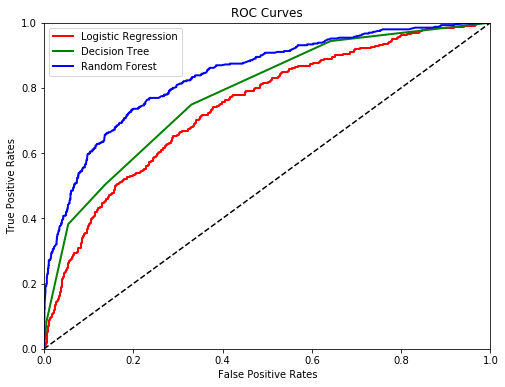

In [251]:

# Plotting ROC curves
def plot_roc(fpr, tpr, models, thresholds=None, title='ROC Curves'):
    colors = ['red', 'green', 'blue', 'brown']
    plt.figure(figsize=(8,6))
    for i in range(len(fpr)):
        plt.plot(
                fpr[i], 
                tpr[i], 
                label=f'ROC curve for class {i}', 
                linewidth=2,
                color=colors[i]
            )
        
    plt.title('ROC Curves')
    plt.xlabel('False Positive Rates')
    plt.ylabel('True Positive Rates')
    plt.plot([0,1], [0,1], 'k--')
    plt.ylim(0, 1)
    plt.xlim(0, 1)
    plt.legend(models)
    plt.show()
    

plot_roc(fprVec, tprVec, ['Logistic Regression', 'Decision Tree', 'Random Forest'])

*Graph Analysis*

By looking at the ROC curves for each model, we can have a better look at the performance of each model. It is clear that the random forest model did a better job at predicting the churn rate than the logistic regression model or the decision tree model.



In [252]:
print('Sanity check: when assigning churn to all users')
report( test_target, predictions=[1 for x in range(len(test_target))])

Sanity check: when assigning churn to all users
Accuracy: 19.51%
Recall: 100.00%
Precision: 19.51%
F1 Score: 32.65%


In [253]:
print('Sanity check: when assigning churn or no-churn interchangeably')
report(test_target, predictions=[0 if x%2 == 0 else 1 for x in range(len(test_target)) ])

Sanity check: when assigning churn or no-churn interchangeably
Accuracy: 51.13%
Recall: 52.82%
Precision: 20.62%
F1 Score: 29.66%


In [254]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

print('Sanity check: when assigning no-churn to all users')
report(test_target, predictions=[0 for x in range(len(test_target))])


Sanity check: when assigning no-churn to all users
Accuracy: 80.49%
Recall: 0.00%
Precision: 0.00%
F1 Score: 0.00%


In [255]:
print('Sanity check: when assigning churn to 2/3 of users')
report(test_target, predictions=[1 if x%3 == 0 else 0 for x in range(len(test_target)) ])

Sanity check: when assigning churn to 2/3 of users
Accuracy: 60.53%
Recall: 34.36%
Precision: 20.09%
F1 Score: 25.35%


In [256]:
final_model = forest_model
importances = final_model.feature_importances_
print(f'The final model is a Random Forest model with 13 estimators. \nThe random state defined was 1995. \nInputs are: \n{train_feat.columns.values}.\n\nThe importances of each feature are respectively', list(importances.round(2)), end='.\n\n')

print('The inputs must be correctly encoded with the associated encoders.')

print('\nGenerating report for validation dataset:')
report(valid_target, features=valid_feat, model=final_model, output=False)

The final model is a Random Forest model with 13 estimators. 
The random state defined was 1995. 
Inputs are: 
['IsActiveMember' 'CreditScore' 'Age' 'Tenure' 'NumOfProducts'
 'EstimatedSalary' 'Geography_Germany' 'Geography_Spain' 'Gender_Male'].

The importances of each feature are respectively [0.1, 0.01, 0.42, 0.01, 0.34, 0.02, 0.06, 0.0, 0.04].

The inputs must be correctly encoded with the associated encoders.

Generating report for validation dataset:
Accuracy: 84.54%
Recall: 61.96%
Precision: 60.89%
F1 Score: 61.42%
AUC-ROC: 85.02%


In [257]:
import joblib

#dump(final_model, 'model.joblib')
#dump(ohe_encoder, 'ohe_encoder.joblib')
#dump(std_scaler, 'std_scaler.joblib')

OBS: Use the code lines above to save the model.

### Results

We have succesfully come up with a Random Forest model that can correctly predict about 84% of the cases, with similar recall and precision rates of 60%. The model has been tuned to use less features in order to reduce the number of information from the user. The features used are the following:

    - Customer's activeness
    - Credit Score
    - Age
    - Tenure
    - NumOfProducts
    - Estimated Salary
    - Country
    - Gender

The model was obtained by dividing data in train, test and validation datasets. After that, data was resampled by shuffling and upsampling the churn cases and downsapling the no-churn cases. The final results shown were obtained by predicting from the validation dataset.

## Conclusion

This document aimed to produce a trained machine learning model to predict churn cases for Beta Bank, so it is a classifier. Data of customers from three regions - Spain, France and Germany - was provided for an exploratory data analysis and model training. The data quality was high enough that only Tenure rates showed missing data, while no other errors were found. By plotting histograms, we could verify that patterns in the data were not very clear to customers apart regarding churns, but still different enough to create a reasonable prediction model. We could also check the correlation between characteristics, and we could see that no specific information is defining when predicting churns, although there were clearly higher rates for German customers and generally female customers. Therefore, the relationships between the data provided and the churn rates are complex, and must be analyzed thoroughly to achieve good predictions results. We can conclude that a model that can predict the churn rate of customers is much needed.

Our final model was able to reach about 84% accuracy, with precision and recall of 60%. A high precision means that the model is able to predict churn cases without missing. A high recall means that the model is able to correctly identify churn cases. We have aimed to achieve reasonable scores for both indexes, by reaching a higher F1 Score. Several provided features of customers were cut out of the required features of the model, as they were not relevant to the prediction according to the exploratory data analysis. The model was trained with a random forest classifier, and was tuned to use less features in order to reduce the number of information from the user. It can be used to predict which users will potentially leave the bank. In that way, Beta Bank may reach out to these users to listen to their specific to retain these customers before they leave. This could also lead to better intelligence regarding customer profiles as well as identifying areas that could be developed in the company, such as product quality in different countries or maybe customer support.

As a final remark, we have checked that customers that use exactly two products are generally less likely to leave the bank. However, this must be further studied before creating a causal relation between these factors and the churn of users. It could be that the experience of integration in using two products is much better than that of using only one product, and this should be included in customer survey. On the other hand, churn rates for customers that use more than two products are very high, although there are not many observations of this case. This could mean that the less popular products do not provide much value to the customers, or that there is an issue when integrating more than 2 products. Additional information about which products were being used by each customer could lead to a better understanding of the customer's experience and their patterns.